In [8]:
import pandas as pd
import numpy as np
from MultilevelRF import *
from read_multilevel import *
import statannot
import seaborn as sns
from scipy import stats
import pandas as pd
from utils_psychological import *
import json
from utils_MEM import args
from os.path import abspath
sys.path.insert(0, abspath('..'))
from paths import SUBJECTS_PATH, cohort_results

In [9]:
cohort="chronic"
data_CP=load_data_psychological_TIP(performance_path=cohort_results("Multilevel", cohort) , area="mp" ,
                              path_data_psycho_2=SUBJECTS_PATH, HC=False, LBP=True, CRPS=True, SCI_NP=True)
cohort="healthy"
data_HC=load_data_psychological_TIP(performance_path=cohort_results("Multilevel", cohort) , area="mp" ,
                              path_data_psycho_2=SUBJECTS_PATH, HC=True, LBP=False, CRPS=False, SCI_NP=False)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='average_subj_bias', ylabel='Density'>

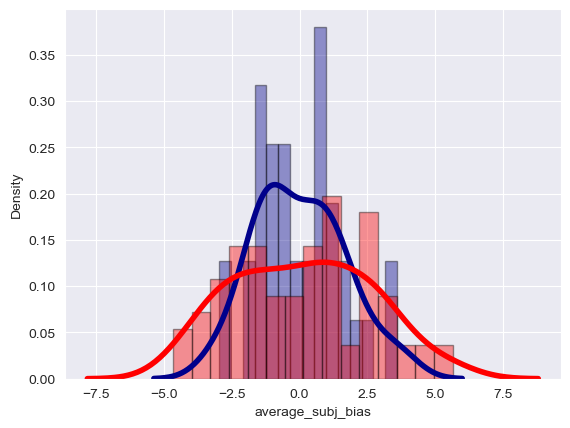

In [10]:
# Density Plot and Histogram of all arrival delays
sns.distplot(data_HC['average_subj_bias'], hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# Density Plot and Histogram of all arrival delays
sns.distplot(data_CP['average_subj_bias'], hist=True, kde=True, 
             bins=15, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [11]:
# compute the standard deviation of the column average_subj_bias for each dataset
std_HC = data_HC['average_subj_bias'].std()
std_CP = data_CP['average_subj_bias'].std()
#print the standard deviation of the column average_subj_bias for each dataset
print("std HC", std_HC)
print("std CP", std_CP)


std HC 1.6365223639714563
std CP 2.5379910901400553


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='average_subj_bias', ylabel='Density'>

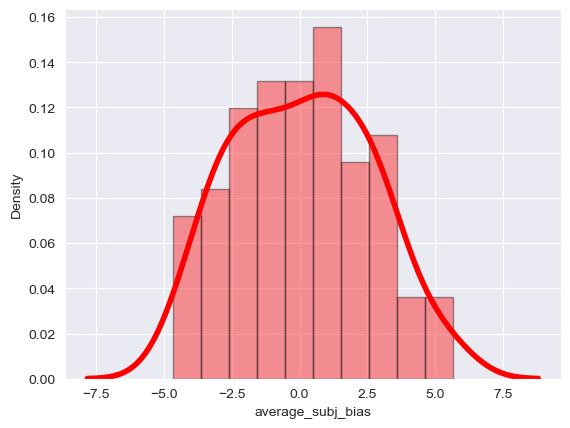

In [12]:
# Density Plot and Histogram of all arrival delays
sns.distplot(data_CP['average_subj_bias'], hist=True, kde=True, 
             bins=10, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [13]:
np.array(data_HC["average_subj_bias"])
path_HC = DATA_DIR+"results/multilevel/data_HC.mat"
path_CP = DATA_DIR+"results/multilevel/data_CP.mat"
scipy.io.savemat(path_HC, {"TIP": np.array(data_HC["average_subj_bias"])})
scipy.io.savemat(path_CP, {"TIP": np.array(data_CP["average_subj_bias"])})

In [14]:
import subprocess
print("Fisher Test on std distribution")
#path= os.path.abspath('')
#cmd_str = "matlab -batch -r \"cd('{}'), F_test_TIP('{}', '{}'), exit".format(path, path_HC, path_CP)
matlab_path = "C:\\Program Files\\MATLAB\\R2023a\\bin\\matlab.exe"

command = "{} -batch \"F_test_TIP('{}', '{}')\"".format(matlab_path, path_HC, path_CP)
try:
    output = subprocess.check_output(command, stderr=subprocess.STDOUT).decode()
except subprocess.CalledProcessError as e:
    output = e.output.decode()
except Exception as e:
    # check_call can raise other exceptions, such as FileNotFoundError
    output = str(e)
print(output)
if float(output) < 0.05:
    print("the two distributions of TIP are statistically different")

Fisher Test on std distribution
    0.0049


the two distributions of TIP are statistically different


In [ ]:
np.array(data_HC["average_subj_bias"])

In [ ]:
np.array(data_CP["average_subj_bias"])